# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from city import variable_name
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 621
['hualmay', 'ushuaia', 'codrington', 'bambous virieux', 'amderma', 'haines junction', 'terrace', 'emilio carranza', 'warren', 'tasiilaq', 'vaini', 'izhma', 'port hardy', 'clyde river', 'tuktoyaktuk', 'hithadhoo', 'kultuk', 'guia de isora', 'beringovskiy', 'vila velha', 'hegang', 'airai', 'vaitupu', 'sinnamary', 'bredasdorp', 'shingu', 'jamestown', 'khorixas', 'mataura', 'lavrentiya', 'williams lake', 'inzer', 'rikitea', 'albany', 'ternate', 'udaipura', 'tawkar', 'busselton', 'georgetown', 'lashio', 'punta arenas', 'thompson', 'taolanaro', 'saint anthony', 'lebu', 'kavieng', 'chebsara', 'bathsheba', 'edgecumbe', 'dikson', 'rio pardo', 'nizhneyansk', 'saint-joseph', 'aquidauana', 'akyab', 'chokurdakh', 'celendin', 'kavaratti', 'magoula', 'berlevag', 'sentyabrskiy', 'sistranda', 'chiredzi', 'norman wells', 'coquimbo', 'isangel', 'fortuna', 'cape town', 'norton', 'vostok', 'nikolskoye', 'cherskiy', 'luderitz', 'makakilo city', 'saskylakh', 'saint-philippe'

In [87]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code
latitude = []
city_id = []
temperature = []
small_list_city = cities[:20]
humidity = []
cloudiness = []
wind_speed = []
final_cities = []
country = []
longitude = []
date = []
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# for index,city in enumerate(variable_name):
#     print(city)
for index, city in enumerate(small_list_city):
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    #print(response)
    try:
        latitude.append(response["coord"]["lat"])
        temperature.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        final_cities.append(response["name"])
        country.append(response["sys"]["country"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
    
    except:
        print("This city is not in the list")
    
    
#response = requests.get(f"http://api.openweathermap.org/data/2.5/group?id=524901,703448,2643743&units;=metric&appid=40870da7d3ae738071ce545303411ae5").json()
  # Print the fact stored within the response

cities_df = pd.DataFrame({'City':final_cities, 'Latitude':latitude, 'Temperature': temperature, 'Humidity':humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Longitude': longitude, 'Date': date, 'Country': country})
print(cities_df)



# Define an empty list to fetch the weather data for each city
#city_data = []

# Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# Create counters
# record_count = 1
# set_count = 1
# print(len(latitude))
# print(len(temperature))
# print(len(humidity))
# print(len(cloudiness))
# print(len(small_list_city))
# print(len(wind_speed))
# print(len(country))
# print(len(longitude))
# print(len(date))

This city is not in the list
               City  Latitude  Temperature  Humidity  Cloudiness  Wind Speed  \
0           Hualmay  -11.0964        76.39        80          81        9.78   
1           Ushuaia  -54.8000        37.06        87         100       37.98   
2        Codrington  -38.2667        57.96        66         100       13.47   
3   Bambous Virieux  -20.3428        75.45        94          75        8.05   
4   Haines Junction   60.7522        35.96        75         100        2.62   
5           Terrace   54.5163        40.91        87          75       17.27   
6   Emilio Carranza   19.9711        72.10        84         100        6.71   
7            Warren   39.4334        50.85        54           0        3.44   
8          Tasiilaq   65.6145        37.56        96         100       30.65   
9             Vaini  -21.2000        86.16        74          40       10.36   
10            Izhma   65.0083        16.29        90          72        8.66   
11       Po

In [6]:
# # Set the API base URL
# url = "api.openweathermap.org"

# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1
# print(cities[0])
# exit()
# # Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities):
          
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url = # YOUR CODE HERE
    
#     # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
#     record_count += 1

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#         city_weather = # YOUR CODE HERE

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = # YOUR CODE HERE
#         city_lng = # YOUR CODE HERE
#         city_max_temp = # YOUR CODE HERE
#         city_humidity = # YOUR CODE HERE
#         city_clouds = # YOUR CODE HERE
#         city_wind = # YOUR CODE HERE
#         city_country = # YOUR CODE HERE
#         city_date = # YOUR CODE HERE

#         # Append the City information into city_data list
#         city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city
#     except:
#         print("City not found. Skipping...")
#         pass
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

SyntaxError: invalid syntax (74268983.py, line 25)

In [88]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=cities_df = pd.DataFrame({'City':final_cities, 'Latitude':latitude, 'Temperature': temperature, 'Humidity':humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Longitude': longitude, 'Date': date, 'Country': country})

# Show Record Count
city_data_df.count()

City           19
Latitude       19
Temperature    19
Humidity       19
Cloudiness     19
Wind Speed     19
Longitude      19
Date           19
Country        19
dtype: int64

In [89]:
# Display sample data
city_data_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Longitude,Date,Country
0,Hualmay,-11.0964,76.39,80,81,9.78,-77.6139,1681088863,PE
1,Ushuaia,-54.8000,37.06,87,100,37.98,-68.3000,1681088863,AR
2,Codrington,-38.2667,57.96,66,100,13.47,141.9667,1681088864,AU
3,Bambous Virieux,-20.3428,75.45,94,75,8.05,57.7575,1681088839,MU
4,Haines Junction,60.7522,35.96,75,100,2.62,-137.5108,1681088839,CA


In [91]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [92]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Longitude,Date,Country
City_ID,,,,,,,,,
0,Hualmay,-11.0964,76.39,80,81,9.78,-77.6139,1681088863,PE
1,Ushuaia,-54.8000,37.06,87,100,37.98,-68.3000,1681088863,AR
2,Codrington,-38.2667,57.96,66,100,13.47,141.9667,1681088864,AU
3,Bambous Virieux,-20.3428,75.45,94,75,8.05,57.7575,1681088839,MU
4,Haines Junction,60.7522,35.96,75,100,2.62,-137.5108,1681088839,CA


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

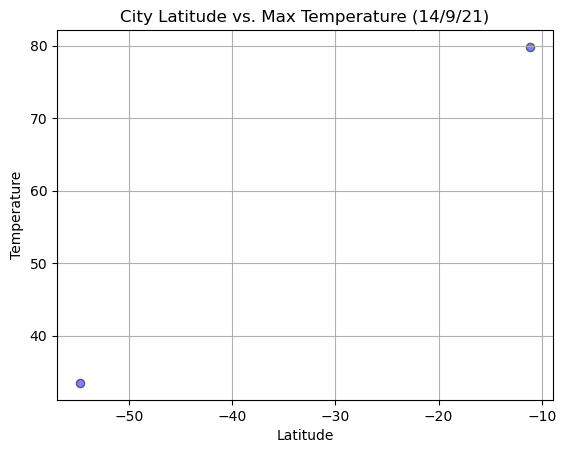

In [53]:
# Build scatter plot for latitude vs. temperature
x_values = cities_df['Latitude']
y_values = cities_df['Temperature']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs. Max Temperature (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

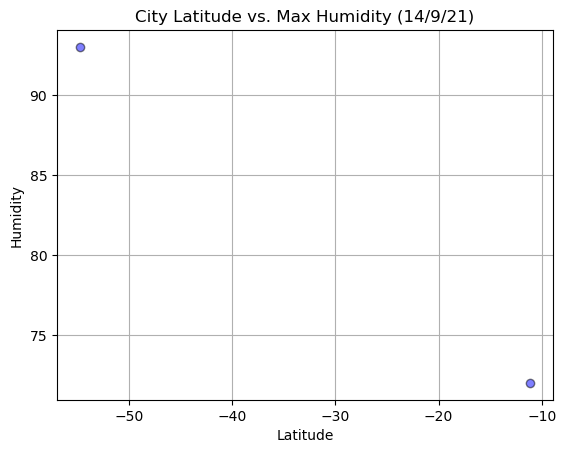

In [48]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = cities_df['Latitude']
y_values = cities_df['Humidity']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Max Humidity (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

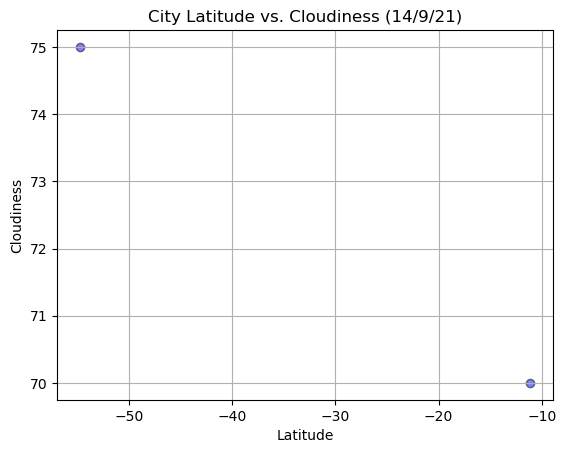

In [49]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
# Build scatter plot for latitude vs. temperature
x_values = cities_df['Latitude']
y_values = cities_df['Cloudiness']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

#### Latitude vs. Wind Speed Plot

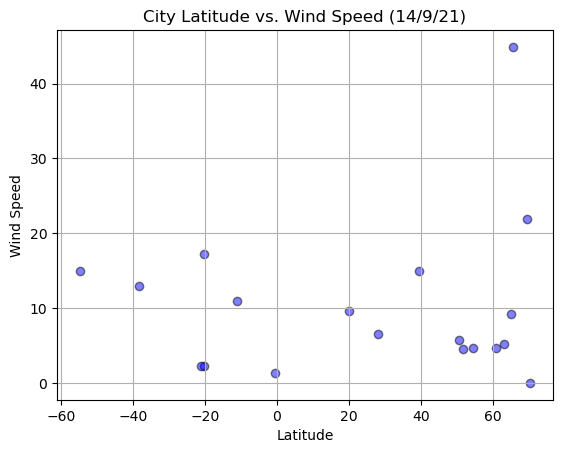

In [62]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
# Build scatter plot for latitude vs. temperature
x_values = cities_df['Latitude']
y_values = cities_df['Wind Speed']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Longitude,Date,Country
4,Haines Junction,60.7522,33.75,80,66,4.61,-137.5108,1681064346,CA
5,Terrace,54.5163,39.11,100,100,4.61,-128.6035,1681064494,CA
6,Emilio Carranza,19.9711,74.28,80,92,9.66,-96.6114,1681064494,MX
7,Warren,39.4334,61.52,38,0,14.97,-84.1666,1681064760,US
8,Tasiilaq,65.6145,42.96,78,100,44.90,-37.6368,1681064805,GL


In [74]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_df = cities_df.loc[cities_df['Latitude']>=0]

# Display sample data
northern_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Longitude,Date,Country
4,Haines Junction,60.7522,33.75,80,66,4.61,-137.5108,1681064346,CA
5,Terrace,54.5163,39.11,100,100,4.61,-128.6035,1681064494,CA
6,Emilio Carranza,19.9711,74.28,80,92,9.66,-96.6114,1681064494,MX
7,Warren,39.4334,61.52,38,0,14.97,-84.1666,1681064760,US
8,Tasiilaq,65.6145,42.96,78,100,44.90,-37.6368,1681064805,GL


In [71]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_df = cities_df.loc[cities_df['Latitude']<0]

# Display sample data
southern_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Longitude,Date,Country
0,Hualmay,-11.0964,79.63,73,80,10.98,-77.6139,1681064735,PE
1,Ushuaia,-54.8000,33.46,100,40,10.36,-68.3000,1681064735,AR
2,Codrington,-38.2667,54.88,75,100,13.35,141.9667,1681065047,AU
3,Bambous Virieux,-20.3428,77.25,88,75,2.30,57.7575,1681065047,MU
9,Vaini,-21.2000,73.56,94,20,2.30,-175.2000,1681064805,TO


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8451351427652284


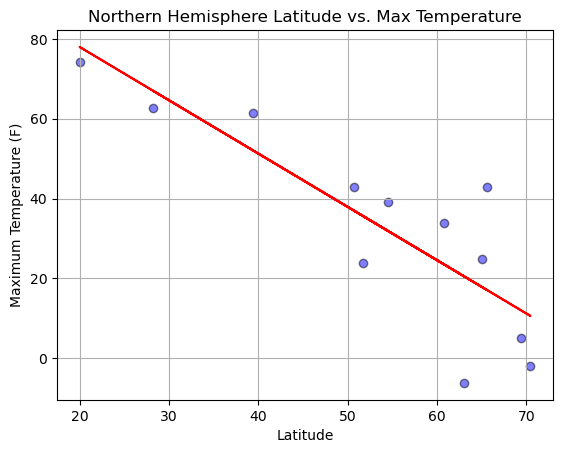

In [76]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_df['Latitude']
y_values = northern_df['Temperature']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Northern Hemisphere Latitude vs. Max Temperature')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(10,40),fontsize=15, color='r')
plt.show()

The r-value is: 0.9441632880686136


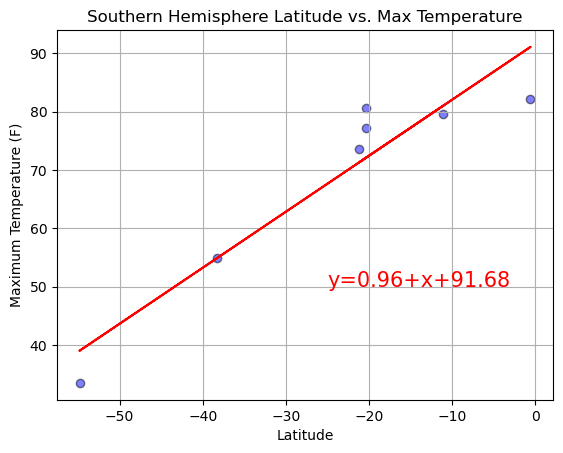

In [78]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Latitude']
y_values = southern_df['Temperature']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Southern Hemisphere Latitude vs. Max Temperature')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-25,50),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
There seems to be a strong relationship between latitude and temperature. Maximum temoerature increases as we near the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.205724430732139


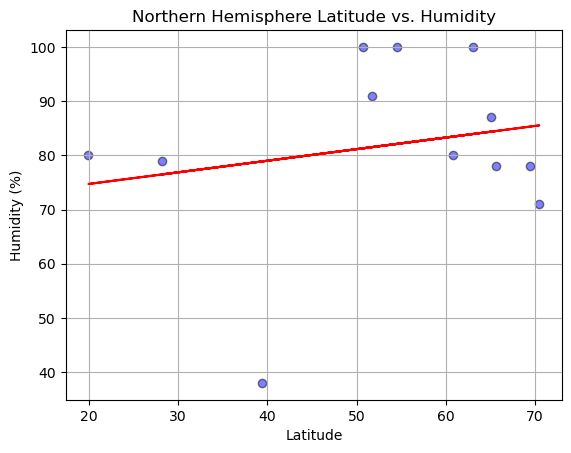

In [79]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(0,30),fontsize=15, color='r')
plt.show()

The r-value is: -0.6610288565236613


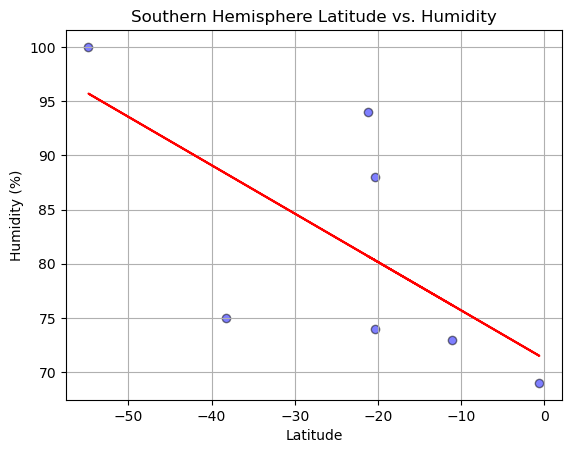

In [81]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-45,50),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
Humidty increases as we near the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.15333274913904615


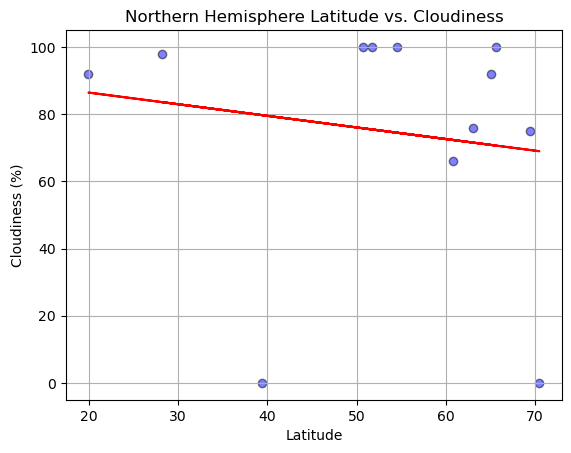

In [82]:
# Northern Hemisphere
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(0,30),fontsize=15, color='r')
plt.show()
# YOUR CODE HERE

The r-value is: -0.29935561177588155


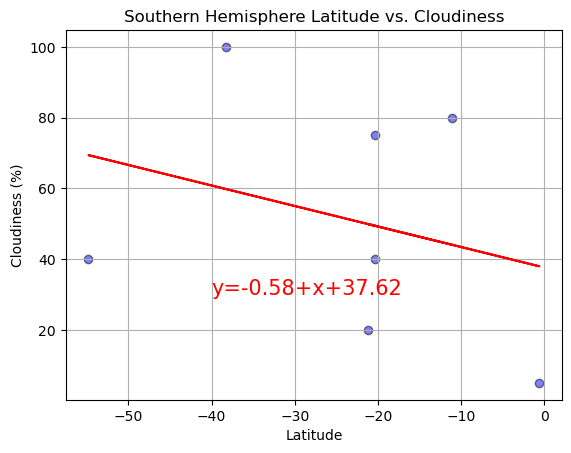

In [83]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-40,30),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
The cloudiness increases as we near the equator but this correation might be weak in the cities of southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1825789062252595


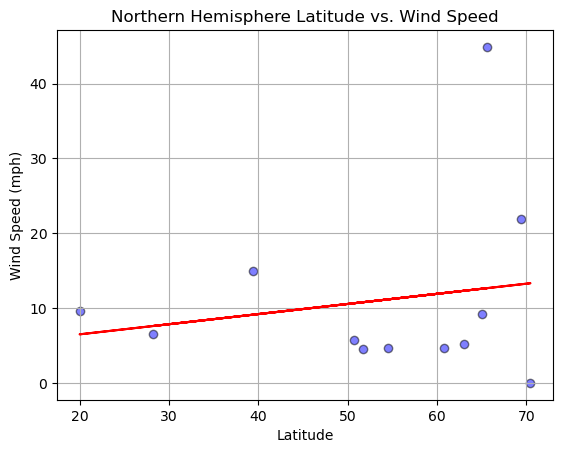

In [84]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(0,12),fontsize=15, color='r')
plt.show()

The r-value is: -0.39978875139120595


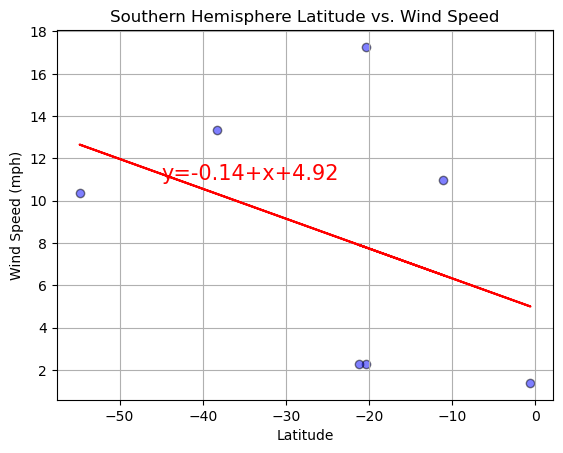

In [85]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-45,11),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
Wind speed appears to be getting higher as cities are located nearer to the north, with no correlation with the equator.